# Analisi clipping Mercedes

In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
from math import pi

ff1.Cache.enable_cache('2023Australia') 
fp = ff1.get_session(2023, 'Australia', 'Q')
fp_laps = fp.load_laps(with_telemetry=True)
fp.load()

In [ ]:
ff1.plotting.setup_mpl()

rus_lap = fp.laps.pick_driver('RUS').pick_fastest()
ver_lap = fp.laps.pick_driver('VER').pick_fastest()

rus_tel = rus_lap.get_car_data().add_distance()
ver_tel = ver_lap.get_car_data().add_distance()

rus_tel = rus_tel.loc[(rus_tel['Speed'].between(240, 360, inclusive=True)) & (rus_tel['Distance'].between(2800, 3500, inclusive=True))]
ver_tel = ver_tel.loc[(ver_tel['Speed'].between(240, 360, inclusive=True)) & (ver_tel['Distance'].between(2800, 3500, inclusive=True))]

mer_color = ff1.plotting.team_color('MER')
rbr_color = ff1.plotting.team_color('RBR')

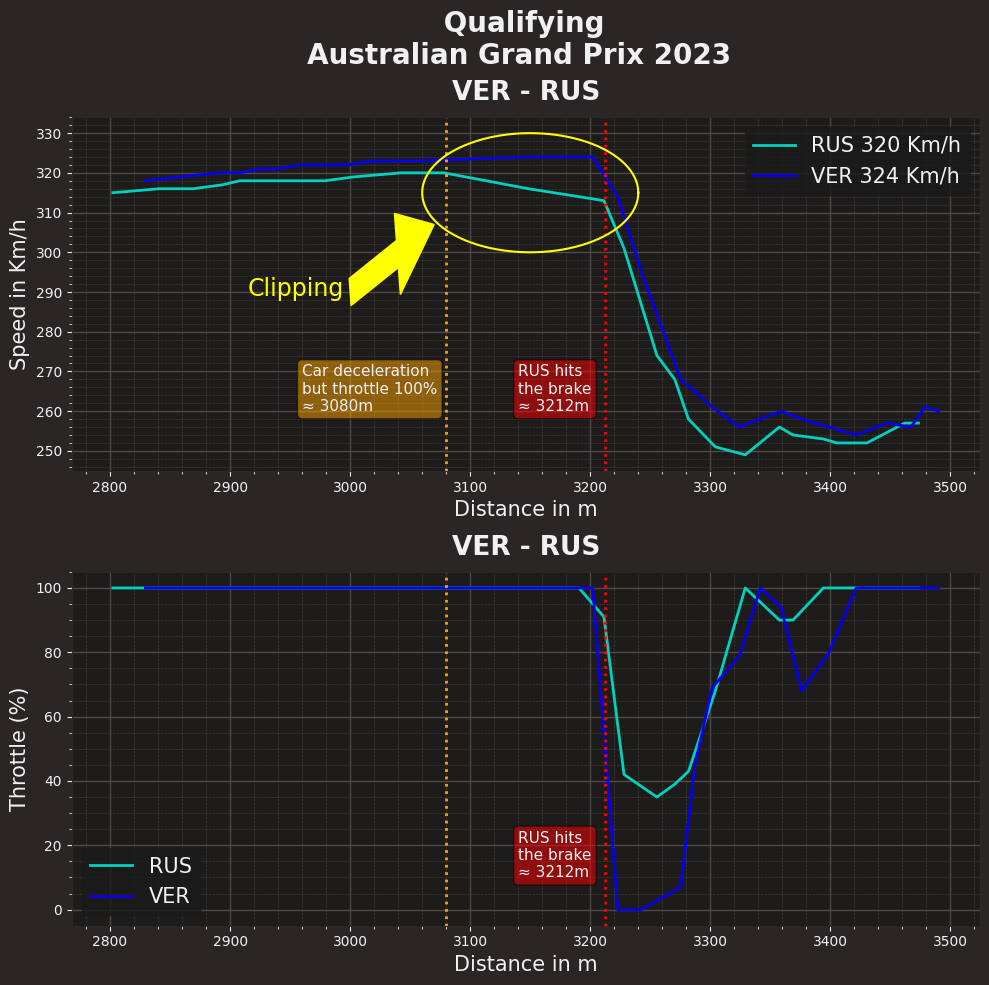

In [79]:
fig, ax = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(10)
ax[0].plot(rus_tel['Distance'], rus_tel['Speed'], color = mer_color, label = 'RUS ' + str(rus_tel['Speed'].max()) + " Km/h", linewidth=2)
ax[0].plot(ver_tel['Distance'], ver_tel['Speed'], color = rbr_color, label = 'VER ' + str(ver_tel['Speed'].max()) + " Km/h", linewidth=2)

ax[0].axvline(x=3212, color = 'red', linestyle=':', linewidth=2)
ax[0].text(x=3140, y = 260, s = "RUS hits\nthe brake\n≈ 3212m", fontsize=11, bbox=dict(boxstyle='round', facecolor='red', alpha=0.5))
ax[0].axvline(x=3080, color = 'orange', linestyle=':', linewidth=2)
ax[0].text(x=2960, y = 260, s = "Car deceleration\nbut throttle 100%\n≈ 3080m ", fontsize=11, bbox=dict(boxstyle='round', facecolor='orange', alpha=0.5))

u=3150     #x-position of the center
v=315    #y-position of the center
a=90     #radius on the x-axis
b=15    #radius on the y-axis
t = np.linspace(0, 2*pi, 100)
ax[0].plot( u+a*np.cos(t) , v+b*np.sin(t), color="yellow")

ax[0].arrow(x = 3000, y = 290, dx = 70, dy=17, width=7, color='yellow', length_includes_head = True)
ax[0].annotate('Clipping', xy = (2915, 289), fontsize=17, color = "yellow")

ax[0].set_xlabel('Distance in m', fontsize=15)
ax[0].set_ylabel('Speed in Km/h', fontsize=15)

ax[0].legend(prop={'size':15})
ax[0].set_title(f"{ver_lap['Driver']} - {rus_lap['Driver']}", fontweight = "bold")

ax[1].plot(rus_tel['Distance'], rus_tel['Throttle'], color = mer_color, label = 'RUS', linewidth=2)
ax[1].plot(ver_tel['Distance'], ver_tel['Throttle'], color = rbr_color, label = 'VER', linewidth=2)
ax[1].text(x=3140, y = 10, s = "RUS hits\nthe brake\n≈ 3212m", fontsize=11, bbox=dict(boxstyle='round', facecolor='red', alpha=0.5))
ax[1].set_xlabel('Distance in m', fontsize=15)
ax[1].set_ylabel('Throttle (%)', fontsize=15)
ax[1].axvline(x=3080, color = 'orange', linestyle=':', linewidth=2)
ax[1].axvline(x=3212, color = 'red', linestyle=':', linewidth=2)
#ax[1].text(x=280, y = 5, s = "LEC hits\nthe brake\n≈375m", fontsize = 11, bbox=dict(boxstyle='round', facecolor='darkgrey', alpha=0.5))
ax[1].legend(prop={'size':15})
ax[1].set_title(f"{ver_lap['Driver']} - {rus_lap['Driver']}", fontweight = "bold")

fig.suptitle(f"      Qualifying\n"
             f"     {fp.event['EventName']} {fp.event.year}", fontsize=20, fontweight='bold')

fig.tight_layout()